In [16]:
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

import numpy as np
import scipy

%matplotlib notebook
import matplotlib.pyplot as plt
#plt.ion()

#import bimpy
from bimpy.analysis.caiman import readCaiman
#from bimpy.analysis.caiman.bCaiman import plotCaimanImage
#from bimpy.analysis.caiman.bCaiman import plotCaimanTrace
#from bimpy.analysis.caiman.bCaiman import caimanAnalyze
from bimpy.analysis.caiman.bCaiman import caimanAlignSpikes


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# list of superior
supFileList = [
    '/media/cudmore/data/20201014/superior/2_nif_superior_cropped_aligned_results.hdf5',
    '/media/cudmore/data/20201014/superior/3_nif_superior_cropped_aligned_results.hdf5',
    '/media/cudmore/data/20201014/superior/4_nif_superior_cropped_aligned_results.hdf5',
]
supTheseComponents = [
    [7, 8, 9, 10, 15, 16, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 32, 35, 36, 50, 51, 55, 56, 57, 58, 59, 62, 66, 67, 71],
    [10, 11, 13, 19, 21, 28, 29, 31, 34, 35, 36, 38, 41, 42, 43, 44, 46, 47, 50, 51, 52, 53, 57, 59, 60, 61, 62, 64, 66, 67, 69, 70, 71, 72, 73, 74],
    [2, 3, 4, 5, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 28, 35, 37, 41, 43, 48, 50, 52, 54],
]

supTheseComponents = [
    [7, 8, 9, 10, 15, 16, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 32, 35, 36, 50, 51, 55, 56, 57, 58, 59, 62, 66, 67, 71],
    [10, 11, 13, 19, 21, 28, 29, 31, 34, 35, 36, 38, 41, 42, 43, 44, 46, 47, 50, 51, 52, 53, 57, 59, 60, 61, 62, 64, 66, 67, 69, 70, 71, 72, 73, 74],
    [2, 3, 4, 5, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 28, 35, 37, 41, 43, 48, 50, 52, 54],
]

# load caiman dicts
supCaimanDictList = []
for idx, supFile in enumerate(supFileList):
    caimanDict = readCaiman(supFile, verbose=False)
    caimanDict['plotTheseComponents'] = supTheseComponents[idx]
    caimanDict['myName'] = 'sup'
    supCaimanDictList.append(caimanDict)

readCaiman() path: /media/cudmore/data/20201014/superior/2_nif_superior_cropped_aligned_results.hdf5
  originalShape: (1200, 1031)
  numROI: 72
readCaiman() path: /media/cudmore/data/20201014/superior/3_nif_superior_cropped_aligned_results.hdf5
  originalShape: (1192, 1056)
  numROI: 79
readCaiman() path: /media/cudmore/data/20201014/superior/4_nif_superior_cropped_aligned_results.hdf5
  originalShape: (1071, 690)
  numROI: 57


In [18]:
# list of inferior
infFileList = [
    '/media/cudmore/data/20201014/inferior/2_nif_inferior_cropped_aligned_results.hdf5',
    '/media/cudmore/data/20201014/inferior/3_nif_inferior_cropped_aligned_results.hdf5',
    #'/media/cudmore/data/20201014/inferior/4_nif_inferior_cropped_aligned_results.hdf5',
]
infTheseComponents = [
    #[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46],
    [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46],
    [2, 3, 6, 7, 12, 13, 14, 15, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 39, 40, 41, 42, 43, 45, 53, 54, 55, 56, 63, 64, 65, 66, 67, 68, 71, 72, 73, 75, 76, 77, 79, 80, 81, 85, 87, 88, 89, 90, 92, 93, 95, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 112],
    [],
]

# load caiman dicts
infCaimanDictList = []
for idx, infFile in enumerate(infFileList):
    caimanDict = readCaiman(infFile, verbose=False)
    caimanDict['plotTheseComponents'] = infTheseComponents[idx]
    caimanDict['myName'] = 'inf'
    infCaimanDictList.append(caimanDict)

readCaiman() path: /media/cudmore/data/20201014/inferior/2_nif_inferior_cropped_aligned_results.hdf5
  originalShape: (1200, 456)
  numROI: 48
readCaiman() path: /media/cudmore/data/20201014/inferior/3_nif_inferior_cropped_aligned_results.hdf5
  originalShape: (1200, 950)
  numROI: 115


<IPython.core.display.Javascript object>


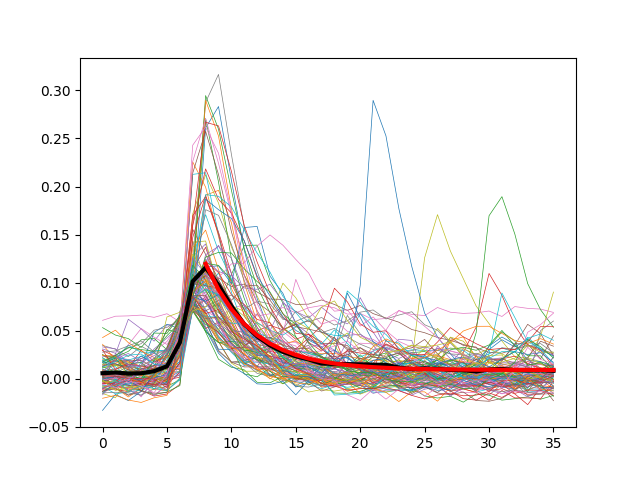

time constant is: 0.27871440926603047


In [39]:
oneCaimanDict = supCaimanDictList[2] # this is the one with really big bright roi (# 32), inf [0]
oneComponentList = supTheseComponents[2]

thresh = 0.07
refractoryPoints = 10
# plot aligned spikes
spikeClipList = caimanAlignSpikes(caimanDict, 
                                  plotTheseComponents=oneComponentList, 
                                  thresh=thresh, 
                                  refractoryPoints=refractoryPoints)

n = spikeClipList[0].size
runningSum = np.zeros(n)
numClips = 0
for spikeClip in spikeClipList:
    #print('spikeClip:', spikeClip.shape)
    isAllNan = np.isnan(spikeClip).all()
    if not isAllNan:
        runningSum += spikeClip
        # plot
        plt.plot(spikeClip, linewidth=0.5)
        # increment
        numClips += 1
# get the mean
meanSpike = runningSum / numClips
xData = np.arange(n)

plt.plot(meanSpike, linewidth=3, color='black');

meanMaxPoint = np.argmax(meanSpike)
xFitThis = xData[meanMaxPoint:]
yFitThis = meanSpike[meanMaxPoint:]

# fit to single exponential decay
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

#p0 = (1.,1.e-5,1.) # starting search koefs
p0 = (1.,0.1,1.) # starting search koefs
opt, pcov = scipy.optimize.curve_fit(model_func, xFitThis, yFitThis, p0)
a, k, b = opt
print('time constant is:', k)

yFit = model_func(xFitThis, a, k, b)
plt.plot(xFitThis, yFit, linewidth=3, color='r')
